In [1]:
import pandas as pd
import scipy
from scipy import io
features_struct = scipy.io.loadmat('../train/Competition_train.mat')
features = features_struct['X']

In [2]:
arr = features[:,0,0]
# arr = arr[0,:]

In [3]:
li2 = arr.tolist()

In [4]:
len(li2)

278

In [5]:
features.shape

(278, 64, 3000)

In [6]:
k = features[0,0,1]


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 

plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文(windows)
plt.rcParams['axes.unicode_minus'] = False   # 用来正常显示负号

df = features[0,0,:]
# df.drop(['region_id'], axis=1, inplace=True)

# 查看原始数据集情况
print('shape:', df.shape)
# print('describle:', df.describe())
# print('data head:', df.head())

# 该数据集,分为3天,时间粒度3min; 
# 首先按天切分数据
df1 = features[0,0,:]
df2 = features[0,1,:]
df3 = features[0,2,:]
# df_0912 = df[:480]
# df_0915 = df[480:960]
# df_0916 = df[960:]

# 生成时间序列：X轴刻度数据
table = pd.DataFrame([i for i in range(3000)],columns=['value'],index=pd.date_range('00:00:00', '02:29:57', freq='3s'))

shape: (3000,)


In [8]:
table

,value
2021-03-31 00:00:00,0
2021-03-31 00:00:03,1
2021-03-31 00:00:06,2
2021-03-31 00:00:09,3
2021-03-31 00:00:12,4
...,...
2021-03-31 02:29:45,2995
2021-03-31 02:29:48,2996
2021-03-31 02:29:51,2997
2021-03-31 02:29:54,2998


D:\anaconda_files\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


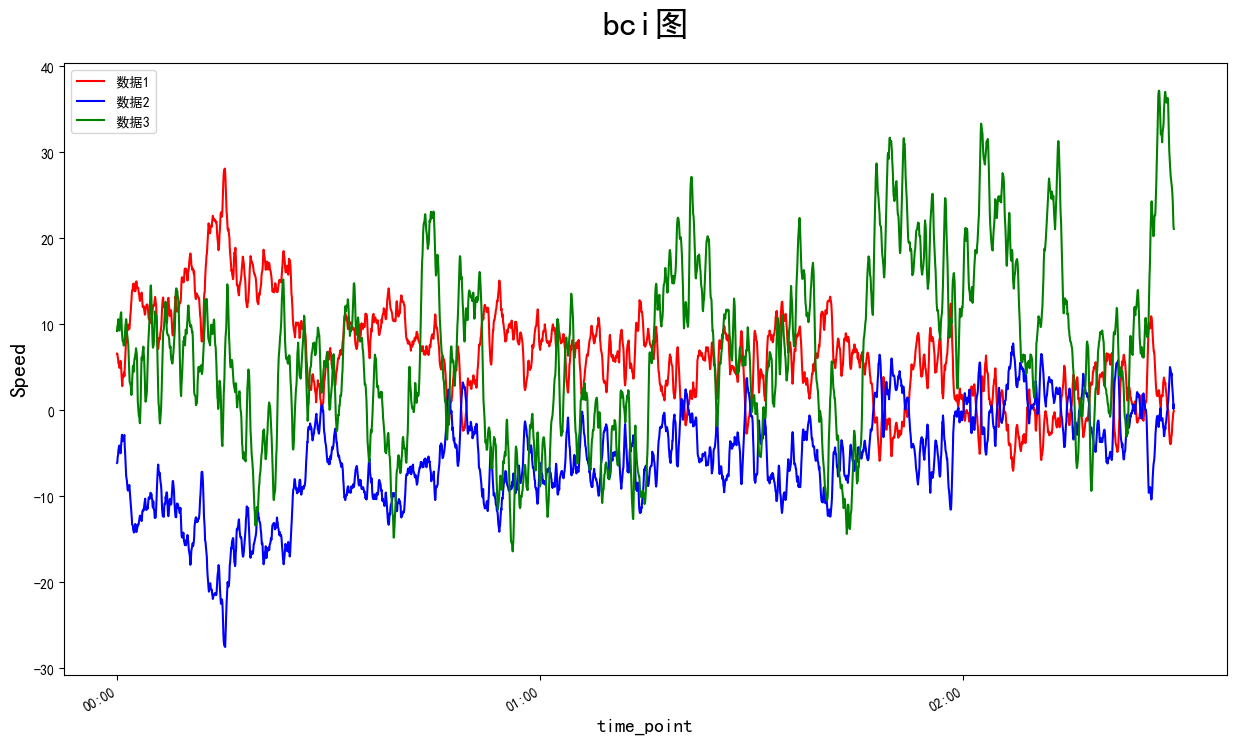

In [9]:
# 图片大小设置
fig = plt.figure(figsize=(15,9), dpi=100)
ax = fig.add_subplot(111)

# X轴时间刻度格式 & 刻度显示
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.xticks(pd.date_range(table.index[0],table.index[-1],freq='H'), rotation=45)

# 绘图
ax.plot(table.index,df1,color='r', label='数据1')
ax.plot(table.index,df2,color='b', label='数据2')
ax.plot(table.index,df3,color='g', label='数据3')

plt.xlabel('time_point', fontsize=14)    # X轴标签
plt.ylabel("Speed", fontsize=16)         # Y轴标签
ax.legend()                              # 图例
plt.title("bci图", fontsize=25, color='black', pad=20)
plt.gcf().autofmt_xdate()

# 隐藏-上&右边线
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# plt.savefig('speed.png')
plt.show()